In [1]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import tensorflow as tf

# 读取数据，构造训练集和测试集

In [3]:
def load_data():
    # 读取数据
    x = np.load('train_data/train_data.npy')
    y = np.load('train_data/label.npy')
    num = len(Counter(y))
    print("类别数量为：", num)
    return x, y, num

In [4]:
def create_train_data(x, y, ratio=0.7):
    """
    x:data
    y:labal
    ratio:生成训练集比率
    """
    # 打乱顺序
    # 读取data矩阵的第一维数（数据个数）
    num_example = x.shape[0]
    # 产生一个num_example范围，步长为1的序列
    arr = np.arange(num_example)
    # 调用函数，打乱顺序
    np.random.seed(99)
    np.random.shuffle(arr)
    # 按照打乱的顺序，重新排序
    arr_data = x[arr]
    arr_label = y[arr]
    # 将数据集分为训练集80%、测试集20%
    s = int(num_example * ratio)
    x_train = arr_data[:s]
    y_train = arr_label[:s]
    x_val = arr_data[s:]
    y_val = arr_label[s:]
    print("训练集shape", x_train.shape)
    print("训练集类别：", Counter(y_train))
    print("测试集shape", x_val.shape)
    print("测试集类别：", Counter(y_val))
    return x_train, y_train, x_val, y_val

# 数据集构建

In [5]:
# 读取数据
data, label, label_count = load_data()
# 生成训练集测试集,70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)
print("*"*10)
print("训练集数量：",len(train_label))
print("测试集数量：",len(val_label))

类别数量为： 4
训练集shape (3919, 1000, 2)
训练集类别： Counter({0: 989, 2: 987, 3: 979, 1: 964})
测试集shape (1681, 1000, 2)
测试集类别： Counter({1: 436, 3: 421, 2: 413, 0: 411})
**********
训练集数量： 3919
测试集数量： 1681


# 随机森林

In [6]:
# 使用机器学习算法需要对多维数据进行降维
m_train = train_data.reshape(train_data.shape[0],train_data.shape[1]*train_data.shape[2])
m_val = val_data.reshape(val_data.shape[0],val_data.shape[1]*val_data.shape[2])

# 设置训练迭代次数
epoch = 30

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score,log_loss
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import model_selection
from sklearn.preprocessing import  OneHotEncoder

## 模型训练

In [8]:
# 模型参数设置
rfc = RandomForestClassifier(n_estimators = 50,min_samples_split = 5,min_samples_leaf = 4,max_depth = 5)

# 模型准确率和损失值
acc_list = []
loss_list = []
train_acc_list = []
print("开始训练")
for i in range(1,epoch +1):

    # 模型训练
    rfc.fit(m_train,train_label)

    # # 训练集
    # y_train = rfc.predict(m_train)

    # 测试集
    y_pred = np.asarray(rfc.predict(m_val),dtype = 'int64')#计算测试集结果和实际结果相符合的比例 

    # 计算准确率
    acc = round(accuracy_score(val_label, y_pred),3)#小数点三位
    
    # 训练集
    y_pred = np.asarray(rfc.predict(m_train),dtype = 'int64')#计算训练结果和实际结果相符合的比例 
    # 计算准确率
    train_acc = round(accuracy_score(train_label, y_pred),3)
    
    # print('测试集准确率:', round(accuracy_score(val_label, y_pred),3))
    acc_list.append(acc)
    train_acc_list.append(train_acc)
    
    # 计算损失值
    # 使用one-hot编码计算损失值
    noe_hot = OneHotEncoder(sparse = False)

    y_pred_o = noe_hot.fit_transform(y_pred.reshape(1, -1))
    val_label_o = noe_hot.fit_transform(val_label.reshape(1, -1))
#     loss = round(log_loss(val_label_o,y_pred_o),3)
    # print("loss：",round(log_loss(val_label,y_pred),3))
#     loss_list.append(loss)
    print("完成第",i,"轮训练，训练集结果准确率：",acc)

开始训练
完成第 1 轮训练，训练集结果准确率： 0.741
完成第 2 轮训练，训练集结果准确率： 0.739
完成第 3 轮训练，训练集结果准确率： 0.72
完成第 4 轮训练，训练集结果准确率： 0.736
完成第 5 轮训练，训练集结果准确率： 0.746
完成第 6 轮训练，训练集结果准确率： 0.729
完成第 7 轮训练，训练集结果准确率： 0.723
完成第 8 轮训练，训练集结果准确率： 0.742
完成第 9 轮训练，训练集结果准确率： 0.745
完成第 10 轮训练，训练集结果准确率： 0.736
完成第 11 轮训练，训练集结果准确率： 0.714
完成第 12 轮训练，训练集结果准确率： 0.725
完成第 13 轮训练，训练集结果准确率： 0.735
完成第 14 轮训练，训练集结果准确率： 0.732
完成第 15 轮训练，训练集结果准确率： 0.726
完成第 16 轮训练，训练集结果准确率： 0.75
完成第 17 轮训练，训练集结果准确率： 0.723
完成第 18 轮训练，训练集结果准确率： 0.736
完成第 19 轮训练，训练集结果准确率： 0.72
完成第 20 轮训练，训练集结果准确率： 0.719
完成第 21 轮训练，训练集结果准确率： 0.727
完成第 22 轮训练，训练集结果准确率： 0.735
完成第 23 轮训练，训练集结果准确率： 0.732
完成第 24 轮训练，训练集结果准确率： 0.733
完成第 25 轮训练，训练集结果准确率： 0.719
完成第 26 轮训练，训练集结果准确率： 0.737
完成第 27 轮训练，训练集结果准确率： 0.735
完成第 28 轮训练，训练集结果准确率： 0.723
完成第 29 轮训练，训练集结果准确率： 0.731
完成第 30 轮训练，训练集结果准确率： 0.716


## 测试集得分

In [9]:
y_pred = np.asarray(rfc.predict(m_val),dtype = 'int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred),3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.716
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       411
           1       0.69      0.78      0.73       436
           2       0.54      0.41      0.46       413
           3       0.76      0.67      0.71       421

    accuracy                           0.72      1681
   macro avg       0.70      0.72      0.70      1681
weighted avg       0.70      0.72      0.70      1681



## 模型迭代准确率

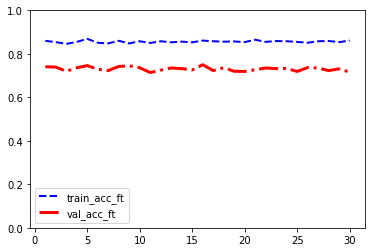

In [19]:
# 设置Y轴范围
plt.ylim(0,1)
# 训练准确率曲线
show_data1_ft= train_acc_list
# 测试准确率曲线
show_data2_ft= acc_list
x_data = list(range(1,len(show_data1_ft)+1))
ln1, = plt.plot(x_data,show_data1_ft,color='blue',linewidth=2.0,linestyle='--')
ln2, = plt.plot(x_data,show_data2_ft,color='red',linewidth=3.0,linestyle='-.')
plt.legend(handles=[ln1,ln2],labels=['train_acc_ft','val_acc_ft'])
plt.show()

## 保存模型

In [11]:
from joblib import dump, load
# 保存模型
dump(rfc, 'models_save/rfc.joblib') 
# # 加载
# rfc = load('models_save/rfc.joblib')
# print(rfc)

['models_save/rfc.joblib']

# CNN

In [12]:
from tensorflow import keras
from tensorflow.keras import layers, models
# 查看GPU是否可用
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


## 网络构建

In [13]:
def cnn_create():
    loss = 'sparse_categorical_crossentropy'
    metrics = ['acc']
    inputs = keras.Input(shape=(1000, 2))
    x = layers.Conv1D(64, 3, activation='relu')(inputs)
    x = layers.MaxPooling1D(16)(x)
    # 全局平均池化GAP层
    x = layers.GlobalAveragePooling1D()(x)
    # 几个密集分类层
    x = layers.Dense(32, activation='relu')(x)
    # 退出层
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(4, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(0.001),
                  loss=loss,
                  metrics=metrics)
    print("实例化模型成功，参数如下：")
    print(model.summary())
    return model

In [14]:
# 实例化模型
cnn_model = cnn_create()

# 设置模型log输出地址
log_dir = os.path.join("logs/CNN")
if not os.path.exists(log_dir):
    os.mkdir(log_dir)

实例化模型成功，参数如下：
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000, 2)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 998, 64)           448       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 62, 64)            0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)  

## 模型训练

In [15]:
# 模型训练
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = cnn_model.fit(train_data, train_label,epochs=30, batch_size=16, validation_split=0.2,callbacks=[tensorboard_callback])

Epoch 1/30
  1/196 [..............................] - ETA: 0s - loss: 1.3567 - acc: 0.2500WARNING:tensorflow:From C:\Users\wuson\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
196/196 [==============================] - 1s 8ms/step - loss: 1.3766 - acc: 0.2817 - val_loss: 1.3600 - val_acc: 0.5038
Epoch 2/30
196/196 [==============================] - 1s 6ms/step - loss: 1.3249 - acc: 0.4195 - val_loss: 1.2551 - val_acc: 0.5038
Epoch 3/30
196/196 [==============================] - 1s 6ms/step - loss: 1.1641 - acc: 0.5161 - val_loss: 1.0208 - val_acc: 0.6135
Epoch 4/30
196/196 [==============================] - 1s 6ms/step - loss: 0.9905 - acc: 0.5579 - val_loss: 0.8552 - val_acc: 0.6186
Epoch 5/30
196/196 [==============================] - 1s 6ms/step - loss: 0.8869 - acc: 0.590

## 模型预测

In [20]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score,log_loss
print("*****完成预处理，进行模型评估*****")
y_pred = cnn_model.predict(val_data)
y_pred = [np.argmax(x) for x in y_pred]

*****完成预处理，进行模型评估*****


## 测试集得分

In [21]:
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred),3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.888
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.81      0.88      0.84       436
           2       0.78      0.76      0.77       413
           3       0.97      0.91      0.94       421

    accuracy                           0.89      1681
   macro avg       0.89      0.89      0.89      1681
weighted avg       0.89      0.89      0.89      1681



## 模型迭代准确率

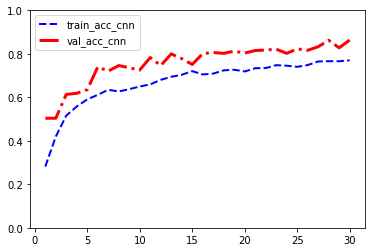

In [22]:
# 设置Y轴范围
plt.ylim(0,1)
# 训练准确率曲线
show_data1_cnn = history.history['acc']
# 测试准确率曲线
show_data2_cnn = history.history['val_acc']
x_data = list(range(1,len(show_data1_cnn)+1))
ln1, = plt.plot(x_data,show_data1_cnn,color='blue',linewidth=2.0,linestyle='--')
ln2, = plt.plot(x_data,show_data2_cnn,color='red',linewidth=3.0,linestyle='-.')
plt.legend(handles=[ln1,ln2],labels=['train_acc_cnn','val_acc_cnn'])
plt.show()

## 保存模型

In [23]:
# 保存模型
model_path = 'models_save/cnn_model.h5'
cnn_model.save(model_path)
print("完成模型训练，保存地址：", model_path)

完成模型训练，保存地址： models_save/cnn_model.h5


# CNN+ResNet

## 网络构建

In [24]:
import n_model as md
import tensorflow as tf
# 模型参数
model_param = {
    "a_shape": 1000,
    "b_shape": 2,
    "label_count": 4,
    "num_b":5
}

data_shape=(model_param['a_shape'],model_param['b_shape'])
# 模型实例化
model = md.CNN_ResNet_model(model_param['label_count'] , model_param['num_b'] , data_shape=data_shape)
# 使用学习率进行训练
res_model = model.model_create(learning_rate = 1e-4)
# 模型网络结构
print("实例化模型成功，网络结构如下：")
print(res_model.summary())
# 设置模型log输出地址
log_dir = os.path.join("logs/ResNet")
if not os.path.exists(log_dir):
    os.mkdir(log_dir)

实例化模型成功，网络结构如下：
Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1000, 2)]    0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 998, 32)      224         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 996, 64)      6208        conv1d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 62, 64)       0           conv1d_2[0][0]                   
_______________________________________________________________________

## 模型训练

In [1]:
# 模型训练
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = res_model.fit(train_data, train_label,epochs=30, batch_size=32, validation_split=0.2,callbacks=[tensorboard_callback])


NameError: name 'tf' is not defined

## 测试集得分

In [26]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score,log_loss
print("*****完成预处理，进行模型评估*****")
y_pred = res_model.predict(val_data)
y_pred = [np.argmax(x) for x in y_pred]
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred),3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

*****完成预处理，进行模型评估*****
------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.999
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       436
           2       1.00      1.00      1.00       413
           3       1.00      1.00      1.00       421

    accuracy                           1.00      1681
   macro avg       1.00      1.00      1.00      1681
weighted avg       1.00      1.00      1.00      1681



## 模型迭代准确率

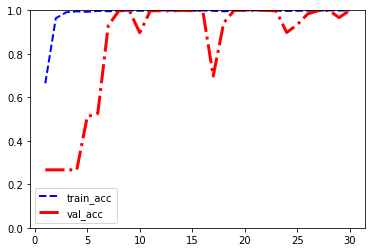

In [27]:
# 设置Y轴范围
plt.ylim(0,1)
# 训练准确率曲线
show_data1_rescnn = history.history['acc']
# 测试准确率曲线
show_data2_rescnn = history.history['val_acc']
x_data = list(range(1,len(show_data1_rescnn)+1))
ln1, = plt.plot(x_data,show_data1_rescnn,color='blue',linewidth=2.0,linestyle='--')
ln2, = plt.plot(x_data,show_data2_rescnn,color='red',linewidth=3.0,linestyle='-.')
plt.legend(handles=[ln1,ln2],labels=['train_acc','val_acc'])
plt.show()

# 保存模型

In [28]:
# 保存模型
model_path = 'models_save/cnn_resnet_model.h5'
res_model.save(model_path)
print("完成模型训练，保存地址：", model_path)

完成模型训练，保存地址： models_save/cnn_resnet_model.h5


# 最终三个模型准确率结果得分如下：

## 随机森林-准确率得分：0.716

## CNN-准确率得分：0.888

## CNN+ResNet-准确率得分：0.999

## LSTM

In [30]:
from tensorflow.keras.layers import  LSTM
train_data1=train_data.reshape(3919,50,-1)

def lstm_create():
    loss = 'sparse_categorical_crossentropy'
    metrics = ['acc']
    inputs = keras.Input(shape=(50, 40))
    x=LSTM(32,return_sequences=True)(inputs)
    x=LSTM(64)(x)
    #x = layers.Conv1D(64, 3, activation='relu')(inputs)
    #x = layers.MaxPooling1D(16)(x)
    # 全局平均池化GAP层
    #x = layers.GlobalAveragePooling1D()(x)
    # 几个密集分类层
    #x = layers.Dense(32, activation='relu')(x)
    # 退出层
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(4, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer='rmsprop',
                  loss=loss,
                  metrics=metrics)
    print("实例化模型成功，参数如下：")
    print(model.summary())
    return model

In [31]:
print(train_data1.shape)

(3919, 50, 40)


In [32]:
# 实例化模型
lstm_model = lstm_create()

# 设置模型log输出地址
log_dir = os.path.join("logs/LSTM")
if not os.path.exists(log_dir):
    os.mkdir(log_dir)

实例化模型成功，参数如下：
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 50, 40)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 50, 32)            9344      
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 260       
Total params: 34,436
Trainable params: 34,436
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
# 模型训练
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = lstm_model.fit(train_data1, train_label,epochs=30, batch_size=32, validation_split=0.2,callbacks=[tensorboard_callback])

Epoch 1/30
98/98 [==============================] - 3s 28ms/step - loss: 1.2615 - acc: 0.3869 - val_loss: 1.1622 - val_acc: 0.4247
Epoch 2/30
98/98 [==============================] - 1s 15ms/step - loss: 1.1429 - acc: 0.4689 - val_loss: 1.1223 - val_acc: 0.4719
Epoch 3/30
98/98 [==============================] - 1s 15ms/step - loss: 1.1002 - acc: 0.4925 - val_loss: 0.9886 - val_acc: 0.4923
Epoch 4/30
98/98 [==============================] - 1s 15ms/step - loss: 1.0731 - acc: 0.5088 - val_loss: 1.0204 - val_acc: 0.4643
Epoch 5/30
98/98 [==============================] - 2s 16ms/step - loss: 1.0493 - acc: 0.5164 - val_loss: 0.9525 - val_acc: 0.5510
Epoch 6/30
98/98 [==============================] - 2s 17ms/step - loss: 1.0414 - acc: 0.5113 - val_loss: 0.9303 - val_acc: 0.5191
Epoch 7/30
98/98 [==============================] - 2s 16ms/step - loss: 1.0241 - acc: 0.5282 - val_loss: 0.9872 - val_acc: 0.5638
Epoch 8/30
98/98 [==============================] - 2s 16ms/step - loss: 1.0118 - a

In [35]:
val_data1=val_data.reshape(1681,50,-1)

In [36]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score,log_loss
print("*****完成预处理，进行模型评估*****")
y_pred = lstm_model.predict(val_data1)
y_pred = [np.argmax(x) for x in y_pred]
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred),3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

*****完成预处理，进行模型评估*****
------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.847
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.86      0.78      0.82       436
           2       0.84      0.66      0.74       413
           3       0.73      0.96      0.83       421

    accuracy                           0.85      1681
   macro avg       0.86      0.85      0.85      1681
weighted avg       0.86      0.85      0.84      1681



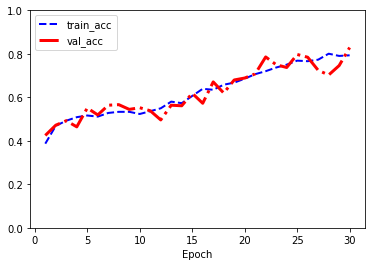

In [37]:
# 设置Y轴范围
plt.ylim(0,1)
# 训练准确率曲线
plt.xlabel("Epoch")
show_data1_lstm = history.history['acc']
# 测试准确率曲线
show_data2_lstm= history.history['val_acc']
x_data = list(range(1,len(show_data1_lstm)+1))
ln1, = plt.plot(x_data,show_data1_lstm,color='blue',linewidth=2.0,linestyle='--')
ln2, = plt.plot(x_data,show_data2_lstm,color='red',linewidth=3.0,linestyle='-.')
plt.legend(handles=[ln1,ln2],labels=['train_acc','val_acc'])
plt.show()

# BiLSTM

In [51]:
from tensorflow.keras.layers import  LSTM,Bidirectional
def bilstm_create():
    loss = 'sparse_categorical_crossentropy'
    metrics = ['acc']
    inputs = keras.Input(shape=(50, 40))
    x=Bidirectional(LSTM(32))(inputs)
    #x = layers.Conv1D(64, 3, activation='relu')(inputs)
    #x = layers.MaxPooling1D(16)(x)
    # 全局平均池化GAP层
    #x = layers.GlobalAveragePooling1D()(x)
    # 几个密集分类层
    #x = layers.Dense(32, activation='relu')(x)
    # 退出层
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(4, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer='rmsprop',
                  loss=loss,
                  metrics=metrics)
    print("实例化模型成功，参数如下：")
    print(model.summary())
    return model

In [52]:
# 实例化模型
bilstm_model = bilstm_create()

# 设置模型log输出地址
log_dir = os.path.join("logs/BiLSTM")
if not os.path.exists(log_dir):
    os.mkdir(log_dir)

实例化模型成功，参数如下：
Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 50, 40)]          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                18688     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 260       
Total params: 18,948
Trainable params: 18,948
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
# 模型训练
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = bilstm_model.fit(train_data1, train_label,epochs=30, batch_size=32, validation_split=0.2,callbacks=[tensorboard_callback])

Epoch 1/30
98/98 [==============================] - 2s 17ms/step - loss: 0.8354 - acc: 0.6089 - val_loss: 0.7602 - val_acc: 0.6543
Epoch 2/30
98/98 [==============================] - 1s 13ms/step - loss: 0.8096 - acc: 0.6306 - val_loss: 0.8187 - val_acc: 0.6059
Epoch 3/30
98/98 [==============================] - 1s 13ms/step - loss: 0.8113 - acc: 0.6150 - val_loss: 0.7192 - val_acc: 0.6620
Epoch 4/30
98/98 [==============================] - 1s 13ms/step - loss: 0.7914 - acc: 0.6367 - val_loss: 0.7669 - val_acc: 0.6531
Epoch 5/30
98/98 [==============================] - 1s 13ms/step - loss: 0.7660 - acc: 0.6453 - val_loss: 0.6790 - val_acc: 0.6633
Epoch 6/30
98/98 [==============================] - 1s 13ms/step - loss: 0.7557 - acc: 0.6491 - val_loss: 0.6767 - val_acc: 0.6658
Epoch 7/30
98/98 [==============================] - 1s 13ms/step - loss: 0.7232 - acc: 0.6654 - val_loss: 0.5984 - val_acc: 0.6786
Epoch 8/30
98/98 [==============================] - 1s 13ms/step - loss: 0.7391 - a

In [59]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score,log_loss
print("*****完成预处理，进行模型评估*****")
y_pred = bilstm_model.predict(val_data1)
y_pred = [np.argmax(x) for x in y_pred]
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred),3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

*****完成预处理，进行模型评估*****
------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.76
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.65      0.63      0.64       436
           2       0.59      0.75      0.66       413
           3       0.87      0.67      0.76       421

    accuracy                           0.76      1681
   macro avg       0.78      0.76      0.76      1681
weighted avg       0.78      0.76      0.76      1681



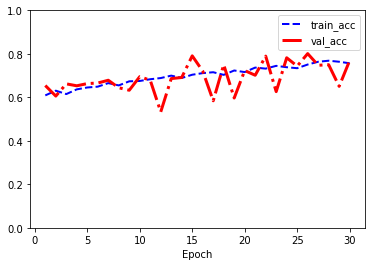

In [60]:
# 设置Y轴范围
plt.ylim(0,1)
# 训练准确率曲线
plt.xlabel("Epoch")
show_data1_bilstm = history.history['acc']
# 测试准确率曲线
show_data2_bilstm = history.history['val_acc']
x_data = list(range(1,len(show_data1_bilstm)+1))
ln1, = plt.plot(x_data,show_data1_bilstm,color='blue',linewidth=2.0,linestyle='--')
ln2, = plt.plot(x_data,show_data2_bilstm,color='red',linewidth=3.0,linestyle='-.')
plt.legend(handles=[ln1,ln2],labels=['train_acc','val_acc'])
plt.show()

# CNN-BiLSTM

In [38]:
print(train_data.shape)

(3919, 1000, 2)


In [72]:
from tensorflow.keras.layers import  LSTM,Bidirectional
def cnnbilstm_create():
    loss = 'sparse_categorical_crossentropy'
    metrics = ['acc']
    inputs = keras.Input(shape=(1000, 2))
    #x = layers.Conv1D(32, 3, activation='relu')(inputs)
    x = layers.Conv1D(64, 3, activation='relu')(inputs)
    x = layers.MaxPooling1D(16)(x)
    x = layers.Conv1D(64, 3, activation='relu')(x)
    x=Bidirectional(LSTM(32))(x)
    # 添加一个CNN层,return_sequences=True
    #x = layers.Conv1D(64, 3, activation='relu')(x)
    # 全局平均池化GAP层
    #x = layers.GlobalAveragePooling1D()(x)
        # 几个密集分类层
    #x = layers.Dense(256, activation='relu')(x)
    #x = layers.GlobalAveragePooling1D()(x)
    # 几个密集分类层
    #x = layers.Dense(32, activation='relu')(x)
    # 退出层
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(4, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer='rmsprop',
                  loss=loss,
                  metrics=metrics)
    print("实例化模型成功，参数如下：")
    print(model.summary())
    return model

In [73]:
# 实例化模型
cnnbilstm_model = cnnbilstm_create()

# 设置模型log输出地址
log_dir = os.path.join("logs/CNN_BiLSTM")
if not os.path.exists(log_dir):
    os.mkdir(log_dir)

实例化模型成功，参数如下：
Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1000, 2)]         0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 998, 64)           448       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 62, 64)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 60, 64)            12352     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                24832     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 4) 

In [74]:
# 模型训练
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = cnnbilstm_model.fit(train_data, train_label,epochs=30, batch_size=32, validation_split=0.2,callbacks=[tensorboard_callback])

Epoch 1/30
98/98 [==============================] - 3s 36ms/step - loss: 1.1526 - acc: 0.4491 - val_loss: 0.7779 - val_acc: 0.6186
Epoch 2/30
98/98 [==============================] - 2s 20ms/step - loss: 0.8301 - acc: 0.6169 - val_loss: 0.7976 - val_acc: 0.5587
Epoch 3/30
98/98 [==============================] - 2s 19ms/step - loss: 0.7499 - acc: 0.6753 - val_loss: 1.1722 - val_acc: 0.4885
Epoch 4/30
98/98 [==============================] - 2s 20ms/step - loss: 0.6835 - acc: 0.7069 - val_loss: 1.0283 - val_acc: 0.5918
Epoch 5/30
98/98 [==============================] - 2s 20ms/step - loss: 0.5905 - acc: 0.7337 - val_loss: 1.1637 - val_acc: 0.5217
Epoch 6/30
98/98 [==============================] - 2s 20ms/step - loss: 0.5623 - acc: 0.7544 - val_loss: 1.0279 - val_acc: 0.4643
Epoch 7/30
98/98 [==============================] - 2s 20ms/step - loss: 0.5062 - acc: 0.7818 - val_loss: 0.5444 - val_acc: 0.7092
Epoch 8/30
98/98 [==============================] - 2s 20ms/step - loss: 0.4933 - a

In [75]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score,log_loss
print("*****完成预处理，进行模型评估*****")
y_pred = cnnbilstm_model.predict(val_data)
y_pred = [np.argmax(x) for x in y_pred]
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred),3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

*****完成预处理，进行模型评估*****
------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.998
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.99      1.00      1.00       436
           2       1.00      0.99      1.00       413
           3       1.00      1.00      1.00       421

    accuracy                           1.00      1681
   macro avg       1.00      1.00      1.00      1681
weighted avg       1.00      1.00      1.00      1681



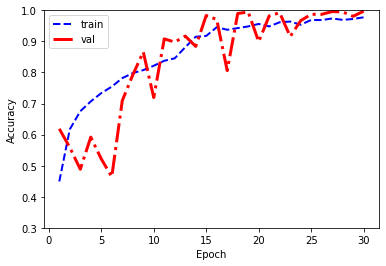

In [77]:
# 设置Y轴范围
plt.ylim(0.3,1)
# 训练准确率曲线
show_data1_cnnbilstm= history.history['acc']
# 测试准确率曲线
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
show_data2_cnnbilstm= history.history['val_acc']
x_data = list(range(1,len(show_data1_cnnbilstm)+1))
ln1, = plt.plot(x_data,show_data1_cnnbilstm,color='blue',linewidth=2.0,linestyle='--')
ln2, = plt.plot(x_data,show_data2_cnnbilstm,color='red',linewidth=3.0,linestyle='-.')
plt.legend(handles=[ln1,ln2],labels=['train','val'])
plt.show()

# 模型对比 

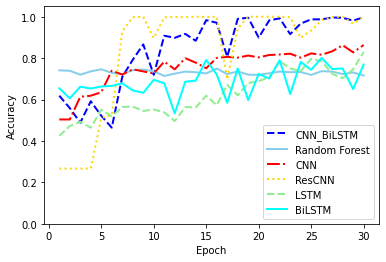

In [78]:
# 设置Y轴范围
plt.ylim(0,1.05)
# 测试准确率曲线
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
x_data = list(range(1,len(show_data1_cnnbilstm)+1))
ln1, = plt.plot(x_data,show_data2_cnnbilstm,color='blue',linewidth=2.0,linestyle='--')
ln2, = plt.plot(x_data,show_data2_ft,color='skyblue',linewidth=2.0,linestyle='-')
ln3, = plt.plot(x_data,show_data2_cnn,color='red',linewidth=2.0,linestyle='-.')
ln4, = plt.plot(x_data,show_data2_rescnn,color='gold',linewidth=2.0,linestyle=':' )
ln5, = plt.plot(x_data,show_data2_lstm,color='lightgreen',linewidth=2.0,linestyle='--')
ln6, = plt.plot(x_data,show_data2_bilstm,color='cyan',linewidth=2.0,linestyle='-')
plt.legend(handles=[ln1,ln2,ln3,ln4,ln5,ln6],labels=['CNN_BiLSTM','Random Forest','CNN','ResCNN','LSTM','BiLSTM'])
plt.show()